# Varietà stabile ed instabile

Prendiamo come esempio il pendolo con attrito:
    
\begin{align}
\ddot x = - \sin(x) - \mu \dot x
\end{align}
    
dove $\mu$ è il coefficiente di attrito. Riscrivendo l'equazione come sistema del primo ordine, troviamo
\begin{align}
\begin{cases}
\dot x = y \\
\dot y = - \sin(x) - \mu y
\end{cases}
\end{align}
I punti di equilibrio del sistema sono dati da $(k\pi, 0)$, con $k \in \mathbb Z$. In particolare ci concentriamo sul punto di equilibrio $\bar x = (\pi, 0)$. 
Il sistema linearizzato al punto di equilibrio è 
\begin{align}
\begin{pmatrix} \dot x  \\ \dot y \end{pmatrix} = \begin{pmatrix}0 & 1 \\ 1 & - \mu \end{pmatrix}
\begin{pmatrix}  x  \\  y \end{pmatrix}
\end{align}
Gli autovalori si calcolano facilmente a mano, comunque sfruttiamo l'occasione per utilizzare le potenzialità di python e dei suoi pacchetti. In particolare useremo numpy e scipy. Cominciamo con importarli

In [1]:
import numpy as np                                  # libreria matematica
from scipy.integrate import odeint                  # altra libreria matematica    odeint e' per integrare le equazioni
import matplotlib.pyplot as plt                     # librerie grafiche
import seaborn


/Users/albertomaspero/Library/Python/3.7/lib/python/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [15]:
m = 0.7                                              # fisso l'attrito 
A = np.array([[0, 1], [1,  - m]])
print(A)

[[ 0.   1. ]
 [ 1.  -0.7]]


Troviamo lo spettro usando la funzione `LA.eig()`

In [16]:
from scipy import linalg as LA                # pacchetto per algebra lineare
evals, evecs = LA.eig(A)
print(evals)
print(evecs)                                   # attenzione: gli autovettori sono in colonna!

#print('autovalore {0} ha autovettore {1}').format(evals[0], evecs[:,0])
#print('autovalore {0} ha autovettore {1}').format(evals[1], evecs[:,1])

[ 0.70948101+0.j -1.40948101+0.j]
[[ 0.81558274 -0.57864046]
 [ 0.57864046  0.81558274]]


L'autovalore negativo  è $\lambda_1 = -1.05124922$ a cui corrisponde la varietà stabile

Il punto di equilibrio $(\pi, 0)$ è perciò una sella. Il teorema della varietà stabile ed instabile ci garantisce che esistono due varietà:
\begin{align}
&W^s(\bar x) = \left\lbrace x \in U \colon \quad \phi^t(x) \to \bar x , \quad t \to \infty \right\rbrace \\
&W^u(\bar x) = \left\lbrace x \in U \colon \quad \phi^t(x) \to \bar x , \quad t \to -\infty \right\rbrace 
\end{align}
Inoltre tali varietà sono tangenti alla varietà stabile ed instabile linearizzate

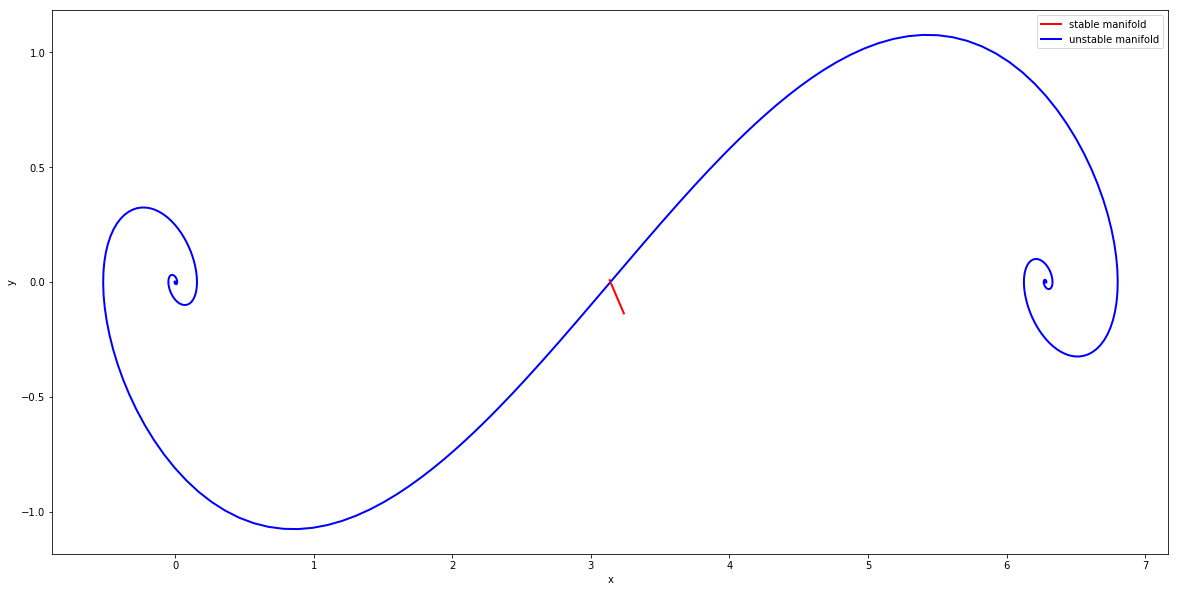

In [18]:
# function that returns vector field
def model(x_y, t):
    x, y  = x_y
    dxdt =  y
    dydt = - np.sin(x)- m*y
    return [dxdt, dydt]

# distanza dal punto fisso da cui partiamo
eps = 0.01

# dimensione della figura
plt.figure(figsize=(20,10))


# autovettori
#varietà stabile lineare
vs = evecs[:,1]
#varietà instabile lineare
vu = evecs[:,0]

################### STABLE MANIFOLD
# time points
t = np.linspace(0,2, 500)

# initial condition for the stable manifold 1    evecs[1] è il vettore a due componenti della varietà stabile
xs0 = np.pi + eps*vs[0]
ys0 = 0.0 +  eps*vs[1]

# initial condition for the stable manifold 2
xs1 = np.pi - eps*vs[0]
ys1 = 0.0 -  eps*vs[1]

# solve ODEs
sm0 = odeint(model,[xs0, ys0],t)         #ricordiamoci di invertire il tempo!! stiamo calcolando la varietà stabile
sm1 = odeint(model, [xs1, ys1], -t)

# plot results
plt.plot(sm0[:,0], sm0[:,1],'r-',linewidth=2,label='stable manifold')    # è il primo ramo della varietà stabile
plt.plot(sm1[:,0], sm1[:,1],'r-',linewidth=2)    # è il primo ramo della varietà stabile
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



################### UNSTABLE MANIFOLD
# time points
t = np.linspace(0,100, 1000)

# initial condition for the stable manifold 1
xu0 = np.pi + eps*vu[0]
yu0 = 0.0 +  eps*vu[1]

# initial condition for the stable manifold 2
xu1 = np.pi - eps*vu[0]
yu1 = 0.0 -  eps*vu[1]

# solve ODEs
um0 = odeint(model,[xu0, yu0],t)         #ricordiamoci di invertire il tempo!! stiamo calcolando la varietà stabile
um1 = odeint(model, [xu1, yu1], t)

# plot results
plt.plot(um0[:,0], um0[:,1],'b-',linewidth=2,label='unstable manifold')    # è il primo ramo della varietà stabile
plt.plot(um1[:,0], um1[:,1],'b-',linewidth=2)    # è il primo ramo della varietà stabile
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



plt.show()

textetetetete

\begin{align}
\dot x = 1
\end{align}